Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
                  Formatted Date        Summary Precip Type  Temperature (C)  \
0  2006-04-01 00:00:00.000 +0200  Partly Cloudy        rain         9.472222   
1  2006-04-01 01:00:00.000 +0200  Partly Cloudy        rain         9.355556   
2  2006-04-01 02:00:00.000 +0200  Mostly Cloudy        rain         9.377778   
3  2006-04-01 03:00:00.000 +0200  Partly Cloudy        rain         8.288889   
4  2006-04-01 04:00:00.000 +0200  Mostly Cloudy        rain         8.755556   

   Apparent Temperature (C)  Humidity  Wind Speed (km/h)  \
0                  7.388889      0.89            14.1197   
1                  7.227778      0.86            14.2646   
2                  9.377778      0.89             3.9284   
3                  5.944444      0.83            14.1036   
4                  6.977778      0.83            11.0446   

   Wind Bearing (degrees)  Vi

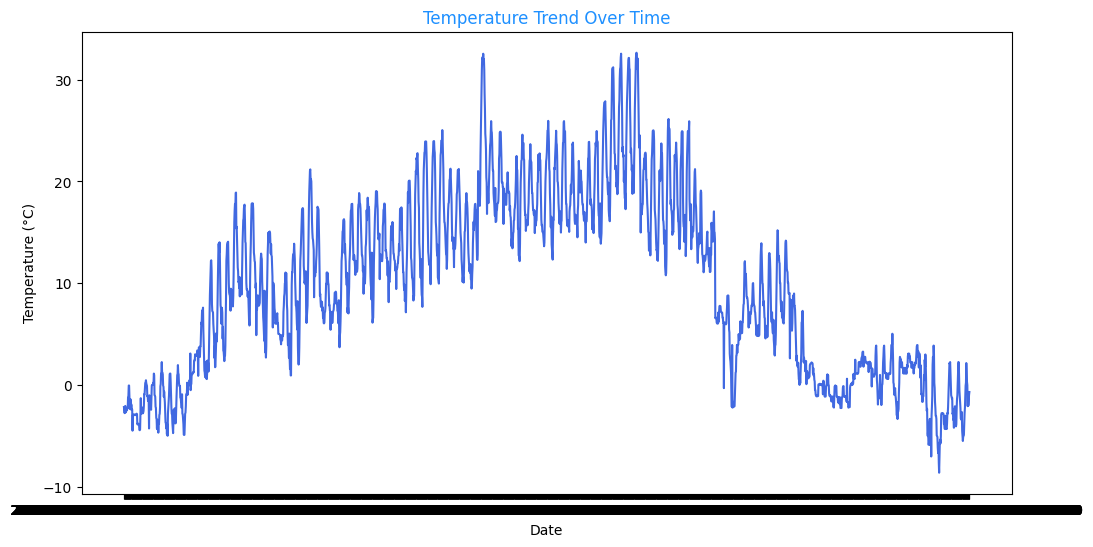

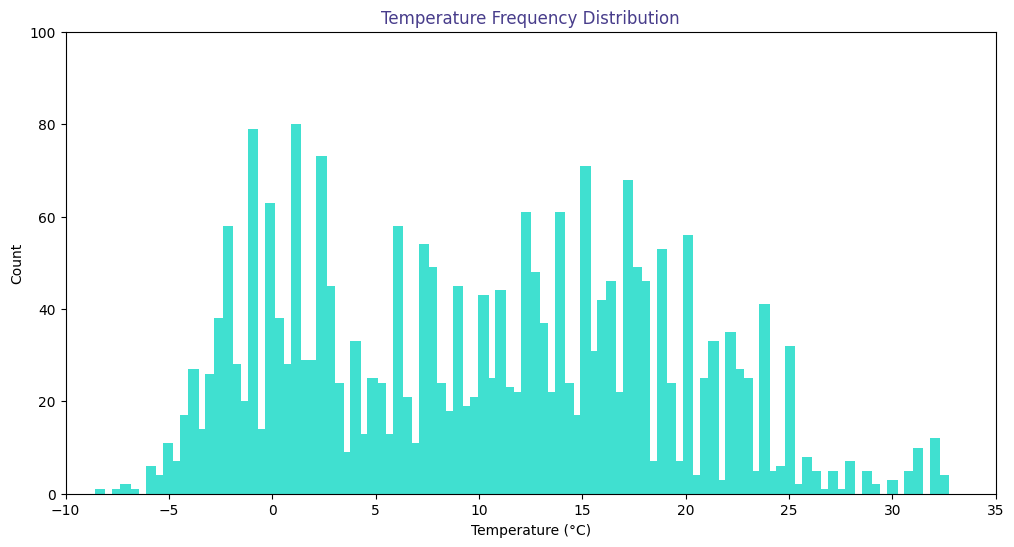

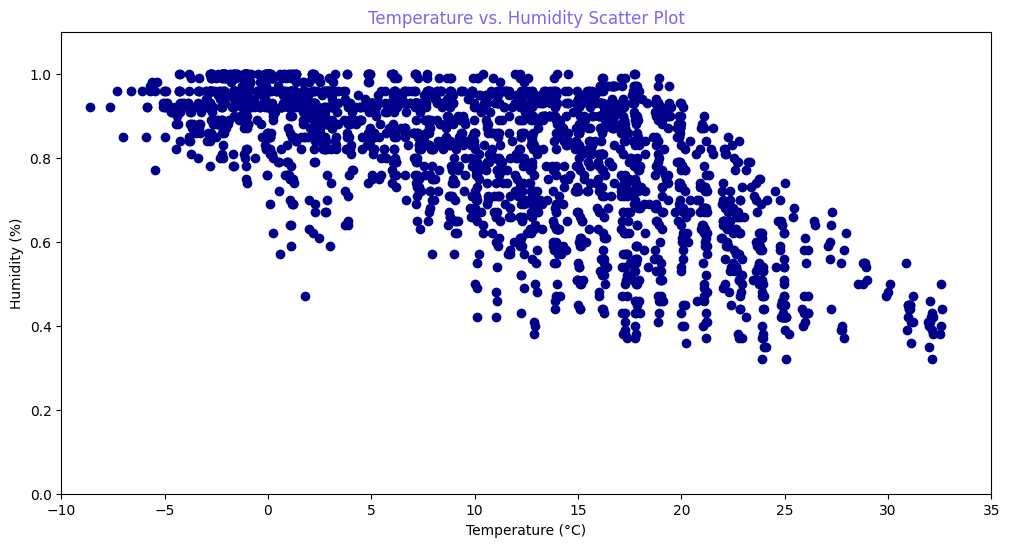

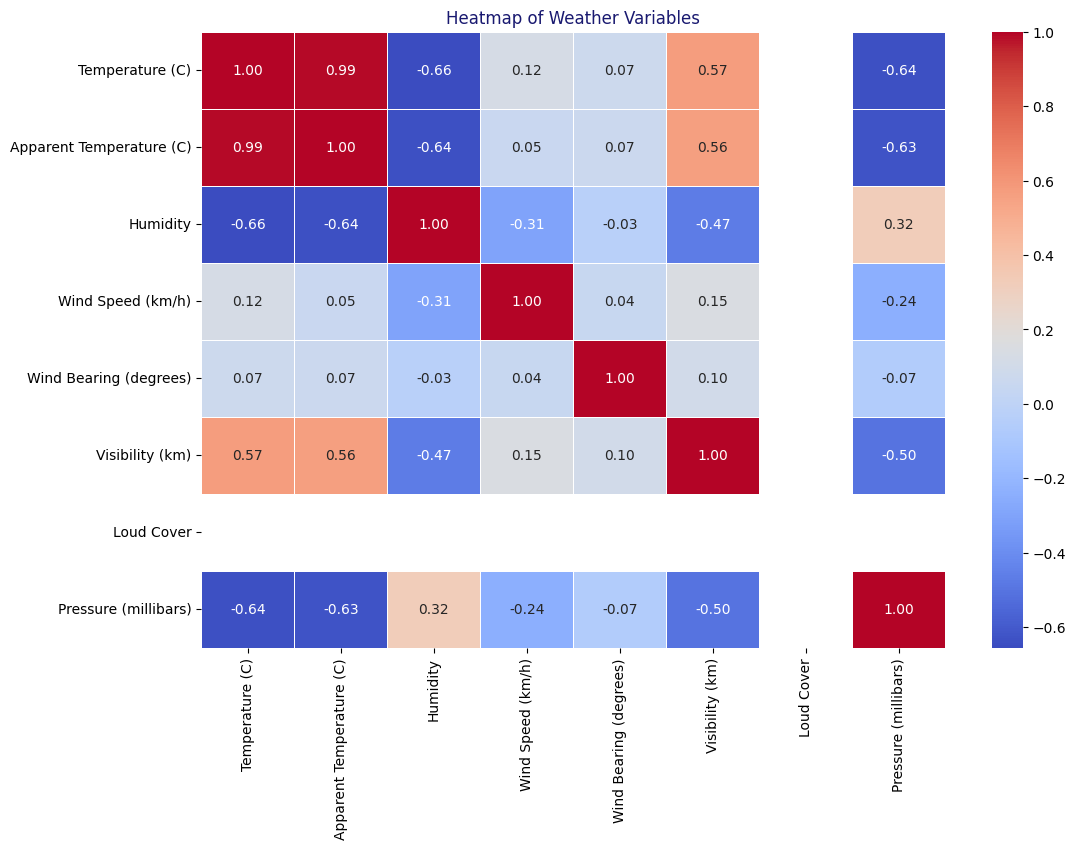

In [9]:

from google.colab import drive
drive.mount('/content/drive')
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

file_path = '/content/drive/MyDrive/MIA/Weather Dataset.csv'

data = pd.read_csv(file_path)

print(data.head())

data = data.drop_duplicates()
data_cleaned = data.dropna()

data = data[(data['Temperature (C)'] >= -50) & (data['Temperature (C)'] <= 50)]
data = data[(data['Apparent Temperature (C)'] >= -50) & (data['Apparent Temperature (C)'] <= 50)]
data = data[(data['Humidity'] >= 0) & (data['Humidity'] <= 1)]
data = data[(data['Wind Speed (km/h)'] >= 0) & (data['Wind Speed (km/h)'] <= 150)]
data = data[(data['Wind Bearing (degrees)'] >= 0) & (data['Wind Bearing (degrees)'] <= 360)]
data = data[(data['Visibility (km)'] >= 0) & (data['Visibility (km)'] <= 100)]
data = data[(data['Loud Cover'] >= 0) & (data['Loud Cover'] <= 1)]
data = data[(data['Pressure (millibars)'] >= 870) & (data['Pressure (millibars)'] <= 1080)]

data = data.sort_values(by= 'Formatted Date', ascending=True)

# Temperature Over Time
plt.figure(figsize=(12, 6))
plt.plot(data['Formatted Date'], data['Temperature (C)'], color='royalblue')
plt.xlabel('Date')
plt.ylabel('Temperature (°C)')
plt.title('Temperature Trend Over Time', color='dodgerblue')
plt.show()

# Histogram of Temperature Distribution
plt.figure(figsize=(12, 6))
plt.hist(data['Temperature (C)'], bins=100, width=0.5, color='turquoise')
plt.xlabel('Temperature (°C)')
plt.ylabel('Count')
plt.title('Temperature Frequency Distribution', color='darkslateblue')
plt.axis([-10, 35, 0, 100])
plt.show()

# Temperature vs. Humidity Scatter Plot
plt.figure(figsize=(12, 6))
plt.scatter(data['Temperature (C)'], data['Humidity'], color='darkblue')
plt.xlabel('Temperature (°C)')
plt.ylabel('Humidity (%)')
plt.title('Temperature vs. Humidity Scatter Plot', color='mediumslateblue')
plt.axis([-10, 35, 0, 1.1])
plt.show()

# Generate The Heatmap
correlation_matrix = data[['Temperature (C)',
                           'Apparent Temperature (C)',
                           'Humidity',
                           'Wind Speed (km/h)',
                           'Wind Bearing (degrees)',
                           'Visibility (km)',
                           'Loud Cover',
                           'Pressure (millibars)']].corr()

plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title('Heatmap of Weather Variables', color='midnightblue')
plt.show()

